<a href="https://colab.research.google.com/github/farahwadya/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales
**Name:** Farah Alwadya

In [209]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Project Overview

In [295]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import set_config
set_config(transform_output='pandas')

## Load and Inspect Data

In [211]:
fpath='/content/drive/MyDrive/AXSOSACADEMY/01-Fundamentals/Week02/Data/sales_predictions_2023.csv'
df_sales=pd.read_csv(fpath)

In [212]:
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [213]:
df_sales.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [214]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Clean Data



In [215]:
df_sales.select_dtypes('object')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,NaN,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


In [216]:
df_sales.rename(columns={'Item_Identifier': 'Item_Id','Outlet_Establishment_Year': 'Est_Year', 'Outlet_Identifier':'Outlet_Id'}	, inplace=True)
df_sales.head()

,Item_Id,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Id,Est_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [217]:
df_sales.select_dtypes('int64','float64')

,Est_Year
0,1999
1,2009
2,1999
3,1998
4,1987
...,...
8518,1987
8519,2002
8520,2004
8521,2009


In [218]:
columns_to_convert = ['Item_Visibility', 'Item_Weight', 'Item_Outlet_Sales']
df_sales[columns_to_convert] = df_sales[columns_to_convert].apply(pd.to_numeric)
print(df_sales[columns_to_convert].dtypes)

Item_Visibility      float64
Item_Weight          float64
Item_Outlet_Sales    float64
dtype: object


In [219]:
df_sales.select_dtypes(include=['int64', 'float64'])

,Item_Weight,Item_Visibility,Item_MRP,Est_Year,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999,3735.1380
1,5.920,0.019278,48.2692,2009,443.4228
2,17.500,0.016760,141.6180,1999,2097.2700
3,19.200,0.000000,182.0950,1998,732.3800
4,8.930,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834
8519,8.380,0.046982,108.1570,2002,549.2850
8520,10.600,0.035186,85.1224,2004,1193.1136
8521,7.210,0.145221,103.1332,2009,1845.5976


#### checking for duplicates

In [220]:
n_duplicates=df_sales.duplicated().sum()
n_duplicates

np.int64(0)

#### checking for missing data

In [221]:
n_missing=df_sales.isna().sum()
n_missing

,0
Item_Id,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Id,0
Est_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [222]:
# check = df_sales.groupby('Item_Id')['Item_Weight'].nunique()

# check[check > 1]

In [223]:
# df_sales['Item_Weight'] = df_sales.groupby('Item_Id')['Item_Weight'].transform('mean')
# df_sales['Item_Weight']

In [224]:
df_sales['Item_Weight'].isna().sum()

np.int64(1463)

In [225]:
df_sales[df_sales['Item_Weight'].isna()]

,Item_Id,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Id,Est_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [226]:
# df_sales['Item_Weight'] = df_sales['Item_Weight'].fillna(-1)
# df_sales['Item_Weight'].isna().sum()

In [227]:
# print(df_sales[['Item_Id','Item_Weight']])

In [228]:
# pd.crosstab(df_sales['Outlet_Type'], df_sales['Outlet_Size'])

In [229]:
# df_sales['Outlet_Size'].nunique()

In [230]:
# for outlet_type in df_sales['Outlet_Type'].unique():
#     if outlet_type != 'Supermarket Type1':

#         most_common = df_sales[df_sales['Outlet_Type']==outlet_type]['Outlet_Size'].mode()[0] #[0] to not got a series, used while filling not taking report
#         df_sales.loc[df_sales['Outlet_Type']==outlet_type, 'Outlet_Size'] = \
#             df_sales.loc[df_sales['Outlet_Type']==outlet_type, 'Outlet_Size'].fillna(most_common)

# df_sales.loc[df_sales['Outlet_Type']=='Supermarket Type1', 'Outlet_Size'] = \
#     df_sales.loc[df_sales['Outlet_Type']=='Supermarket Type1', 'Outlet_Size'].fillna('Missing')

# print(df_sales[['Outlet_Type','Outlet_Size']].isna().sum())

In [231]:
# print(df_sales[['Outlet_Type','Outlet_Size']].isna().sum())
# df_sales['Item_Weight'].isna().sum()

In [232]:
# df_sales.isnull().sum()
# df_sales.isnull().mean() * 100   # النسبة %

#### checking for consistency

In [233]:
df_sales.head(5)

,Item_Id,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Id,Est_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [234]:
object_cols = df_sales.select_dtypes(include='object')
print(object_cols.nunique()) #Outlet_Type Outlet_Size Item_Fat_Content Outlet_Location_Type Outlet_Type

Item_Id                 1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Id                 10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64


In [235]:
cols_to_check = ['Outlet_Type', 'Outlet_Size', 'Item_Fat_Content', 'Outlet_Location_Type']

# نعرض القيم الفريدة لكل عمود بدون حذف أي شيء
for col in cols_to_check:
    print(f"unique values {col}:")
    print(df_sales[col].unique())

unique values Outlet_Type:
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']
unique values Outlet_Size:
['Medium' nan 'High' 'Small']
unique values Item_Fat_Content:
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
unique values Outlet_Location_Type:
['Tier 1' 'Tier 3' 'Tier 2']


In [236]:
# item fat content:
df_sales['Item_Fat_Content'] = df_sales['Item_Fat_Content'].replace({
    'low fat': 'Low Fat',
    'LF': 'Low Fat',
    'reg': 'Regular'})
df_sales['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

##### statistical results

In [237]:
numerical_cols = df_sales.select_dtypes(include=['int64', 'float64'])

# نعرض الملخص الإحصائي لكل عمود: min, max, mean
summary_stats = numerical_cols.agg(['min', 'max', 'mean'])
print(summary_stats)

      Item_Weight  Item_Visibility    Item_MRP     Est_Year  Item_Outlet_Sales
min      4.555000         0.000000   31.290000  1985.000000          33.290000
max     21.350000         0.328391  266.888400  2009.000000       13086.964800
mean    12.857645         0.066132  140.992782  1997.831867        2181.288914


## Exploratory Data Analysis

#### Histograms to view the distributions of numerical features in the dataset

In [238]:
df_sales.head()

,Item_Id,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Id,Est_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


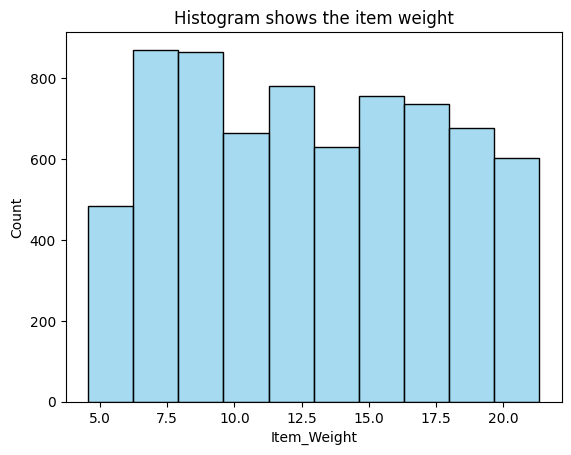

In [239]:
plt.figure()
sns.histplot(df_sales['Item_Weight'],bins=10,color='skyblue')
plt.title('Histogram shows the item weight')
plt.show()


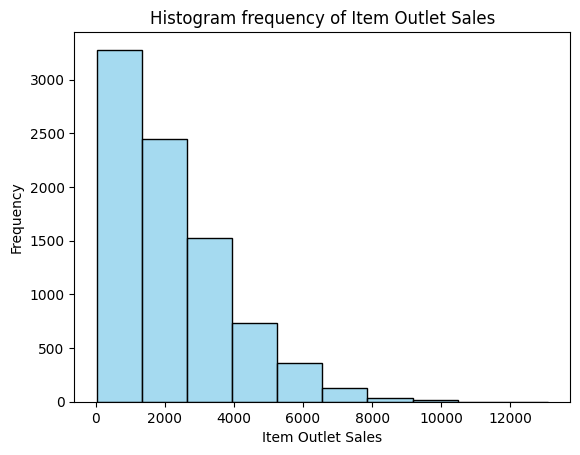

In [240]:
sns.histplot(df_sales['Item_Outlet_Sales'],bins=10,color='skyblue',edgecolor='black')
plt.title('Histogram frequency of Item Outlet Sales')
plt.xlabel('Item Outlet Sales')
plt.ylabel('Frequency')
plt.show()

#### Boxplots to view statistical summaries of numerical features in your dataset

#### boxplot for the Item_Visibility column




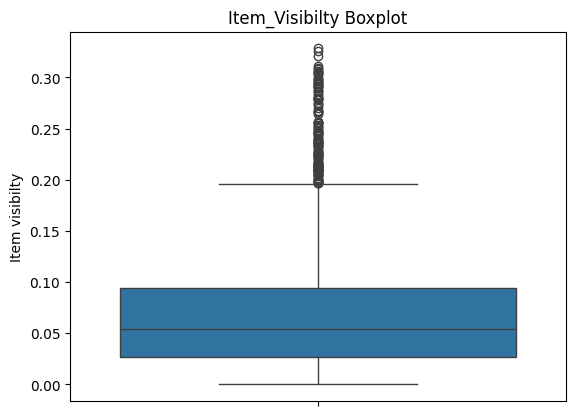

In [241]:
sns.boxplot(data=df_sales,y='Item_Visibility')
plt.title('Item_Visibilty Boxplot')
plt.ylabel('Item visibilty')
plt.show()

#### boxplot for the estimation year column:
the result down show no outlier

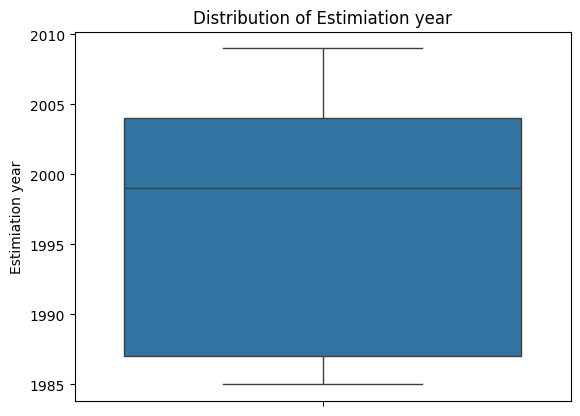

In [242]:
sns.boxplot(data=df_sales,y='Est_Year')
plt.title('Distribution of Estimiation year')
plt.ylabel('Estimiation year')
plt.show()


#### Countplots to view the frequency of each class of categorial features in your dataset.

In [243]:
df_sales.select_dtypes(include=['object', 'category']).columns

Index(['Item_Id', 'Item_Fat_Content', 'Item_Type', 'Outlet_Id', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

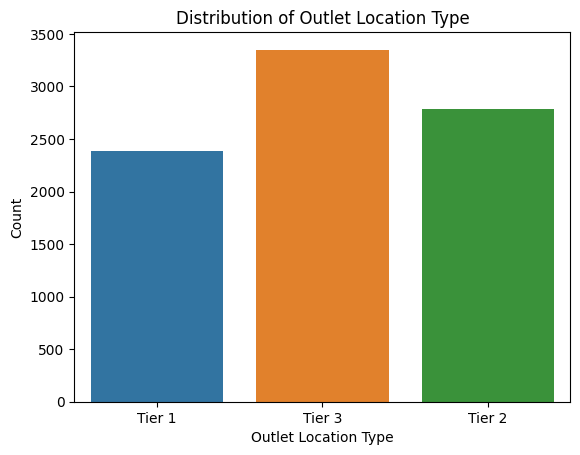

In [244]:
sns.countplot(data=df_sales,x='Outlet_Location_Type',hue='Outlet_Location_Type')
plt.title('Distribution of Outlet Location Type')
plt.xlabel('Outlet Location Type')
plt.ylabel('Count')
plt.show()


### countplot for the outlet type column

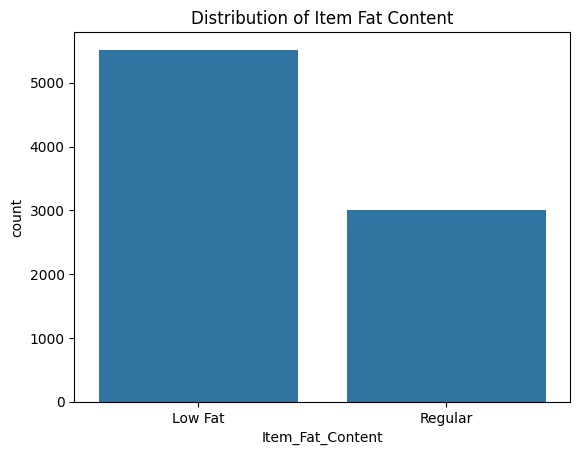

In [245]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df_sales, x='Item_Fat_Content')
plt.title('Distribution of Item Fat Content')
plt.show()

### scatter plot show the relation between Item Visibility vs Outlet Sales

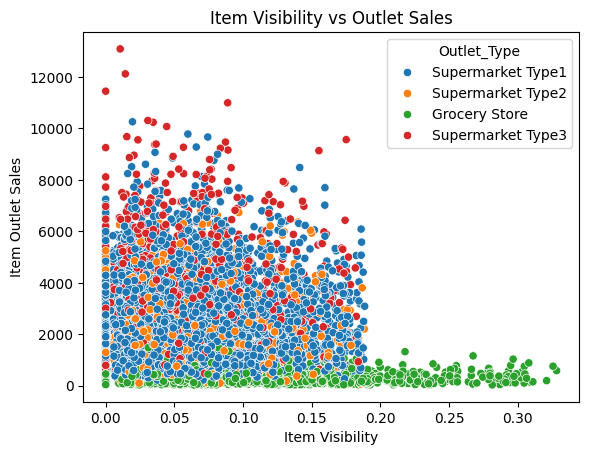

In [246]:
sns.scatterplot(data=df_sales, x='Item_Visibility', y='Item_Outlet_Sales',  hue='Outlet_Type')
plt.title('Item Visibility vs Outlet Sales')
plt.xlabel('Item Visibility')
plt.ylabel('Item Outlet Sales')
plt.show()

## Feature Inspection




In [247]:
"""UNIVARIATE PLOTTING FUNCTIONS FOR EDA"""
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Add the print statements to the function
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  """Creates a seaborn countplot with the option to temporarily fill missing values
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax


# TO DO: add the new print statements from explore_categorical
def explore_numeric(df, x, figsize=(6,5) ):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes


In [248]:
"""MULTIVARIATE PLOTTING FUNCTIONS VS. NUMERIC TARGET"""

def plot_categorical_vs_target(df, x, y='Item_Outlet_Sales',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  """Plots a combination of a seaborn barplot of means combined with
  a seaborn stripplot to show the spread of the data.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax


def plot_numeric_vs_target(df, x, y='Item_Outlet_Sales',
                           figsize=(6,4)):
  """Plots a seaborn regplot with Pearson's correlation (r) added
  to the title.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','linewidths':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  # Make sure the plot is shown before the print statement
  plt.show()

  return fig, ax

## `'Item_Weight'` column

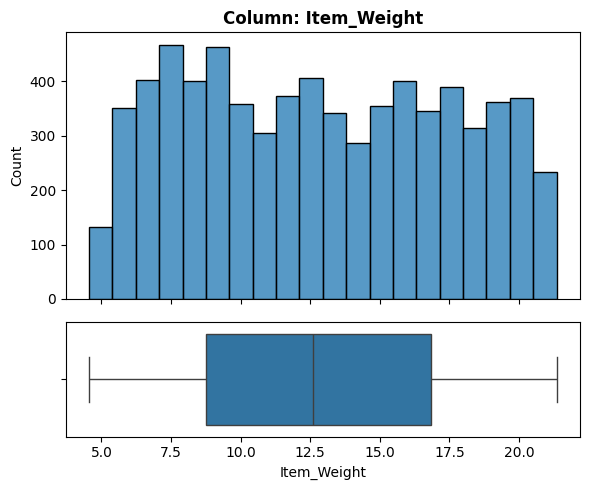

- NaN's Found: 1463 (17.17%)
- Unique Values: 415
- Most common value: 'nan' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


(<Figure size 600x500 with 2 Axes>,
 array([<Axes: title={'center': 'Column: Item_Weight'}, xlabel='Item_Weight', ylabel='Count'>,
        <Axes: xlabel='Item_Weight'>], dtype=object))

In [249]:
explore_numeric(df_sales, x='Item_Weight', figsize=(6,5) )

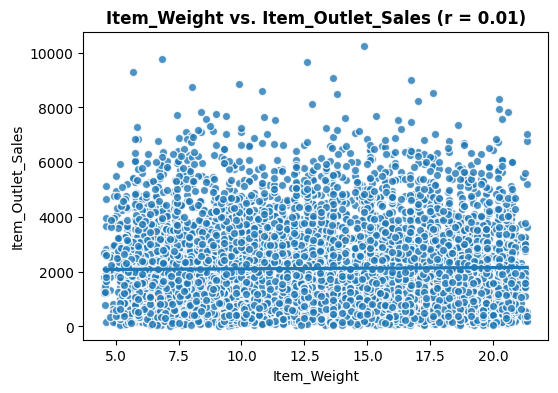

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Item_Weight vs. Item_Outlet_Sales (r = 0.01)'}, xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>)

In [250]:
plot_numeric_vs_target(df_sales,x='Item_Weight', y='Item_Outlet_Sales')

In [251]:
corr = df_sales['Item_Weight'].corr(df_sales['Item_Outlet_Sales'])
print("Correlation:", corr)

Correlation: 0.014122739280056456




```
17% can be impute by the item id, then it may affect the sales however it seems that there's no correlation between weight and Item_Outlet_Sales
```



In [252]:
df_sales.head(1)

,Item_Id,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Id,Est_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138


## `Item_Fat_Content` column

/tmp/ipython-input-809621539.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


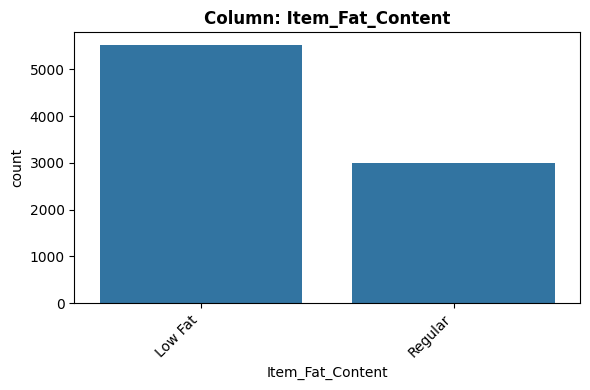

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Low Fat' occurs 5517 times (64.73%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Item_Fat_Content'}, xlabel='Item_Fat_Content', ylabel='count'>)

In [253]:
explore_categorical(df_sales, x= 'Item_Fat_Content')

/tmp/ipython-input-1022643315.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Item_Fat_Content vs. Item_Outlet_Sales'}, xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>)

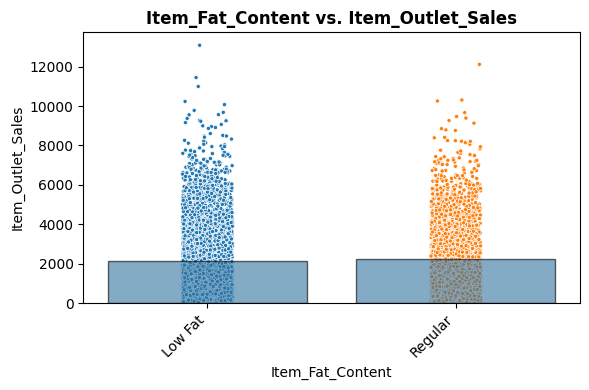

In [254]:
plot_categorical_vs_target(df_sales, x= 'Item_Fat_Content', y='Item_Outlet_Sales')

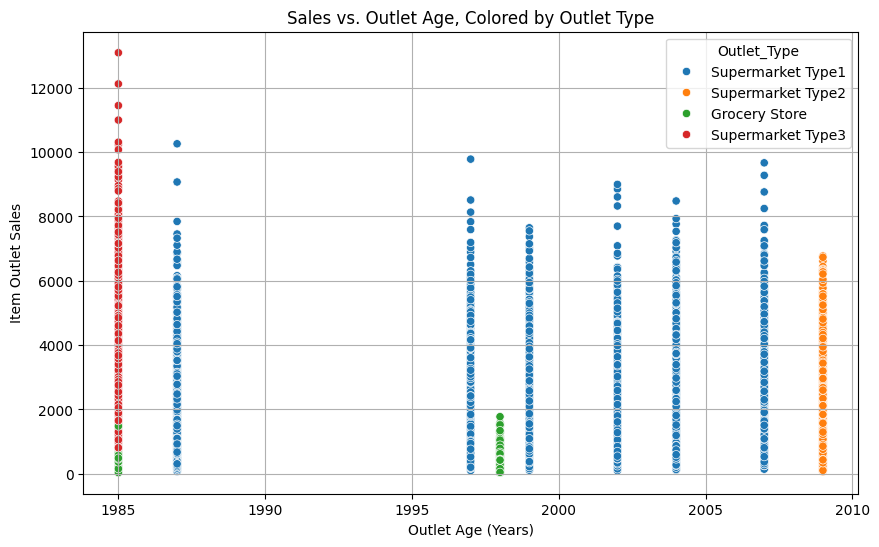

In [255]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Est_Year', y='Item_Outlet_Sales', data=df_sales, hue='Outlet_Type')
plt.title('Sales vs. Outlet Age, Colored by Outlet Type')
plt.xlabel('Outlet Age (Years)')
plt.ylabel('Item Outlet Sales')
plt.grid(True)
plt.show()

In [256]:
from scipy.stats import f_oneway

categories = df_sales['Item_Fat_Content'].unique()
groups = [df_sales[df_sales['Item_Fat_Content'] == cat]['Item_Outlet_Sales'] for cat in categories]
f_stat, p_value = f_oneway(*groups)
print("F-statistic:", f_stat, "p-value:", p_value)

F-statistic: 2.9866642901573295 p-value: 0.08398916967694944


in `Item_Fat_Content` it also seem that there's no correlation and `Item_Fat_Content` doesn't affect the sales too much

## `Item_Visibility	` numeric column

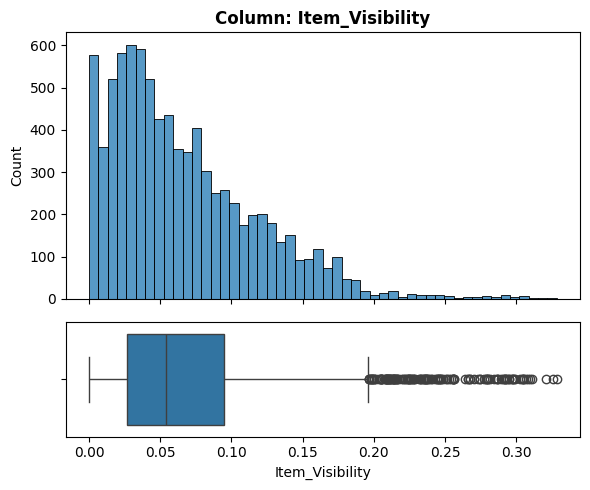

- NaN's Found: 0 (0.0%)
- Unique Values: 7880
- Most common value: '0.0' occurs 526 times (6.17%)
- Not constant or quasi-constant.


(<Figure size 600x500 with 2 Axes>,
 array([<Axes: title={'center': 'Column: Item_Visibility'}, xlabel='Item_Visibility', ylabel='Count'>,
        <Axes: xlabel='Item_Visibility'>], dtype=object))

In [257]:
explore_numeric(df_sales, x='Item_Visibility')

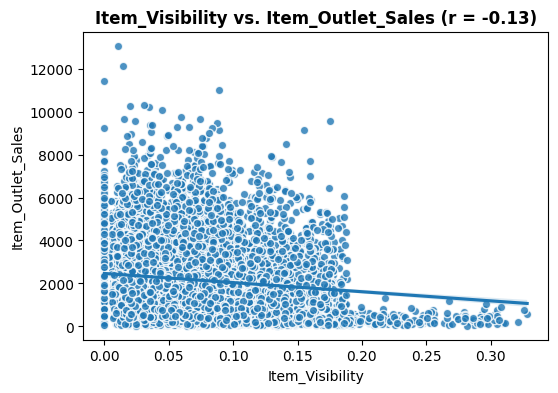

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Item_Visibility vs. Item_Outlet_Sales (r = -0.13)'}, xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>)

In [258]:
plot_numeric_vs_target(df_sales, x='Item_Visibility', y='Item_Outlet_Sales')

In [259]:
corr = df_sales['Item_Visibility'].corr(df_sales['Item_Outlet_Sales'])
print("Correlation:", corr)

Correlation: -0.12862461222077026


`Item_Visibility', 'Item_Outlet_Sales` it looks as if there's nearly no correlation as the distribution does'nt change in a way that appear strongly, as we may expect that the visibilty would sure affect the sales, however, this picture improve the opposite

## `Item_Type` a categorical column to show the type of item

In [260]:
df_sales.head(1)

,Item_Id,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Id,Est_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138


/tmp/ipython-input-809621539.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


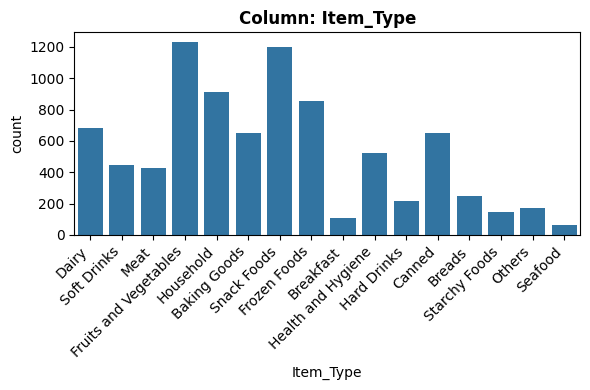

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Item_Type'}, xlabel='Item_Type', ylabel='count'>)

In [261]:
explore_categorical(df_sales, x= 'Item_Type')

/tmp/ipython-input-1022643315.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Item_Type vs. Item_Outlet_Sales'}, xlabel='Item_Type', ylabel='Item_Outlet_Sales'>)

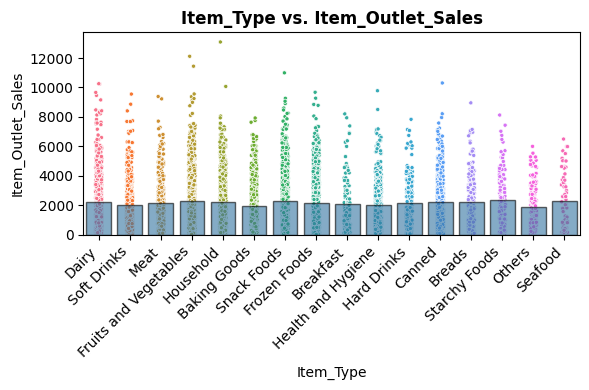

In [262]:
plot_categorical_vs_target(df_sales,x='Item_Type',y='Item_Outlet_Sales')
#cardinality >10, 16 high

In [263]:
categories = df_sales['Item_Type'].unique()
groups = [df_sales[df_sales['Item_Type'] == cat]['Item_Outlet_Sales'] for cat in categories]
f_stat, p_value = f_oneway(*groups)
print("F-statistic:", f_stat, "p-value:", p_value)

F-statistic: 2.7006532875210403 p-value: 0.00038843993766501125


`item type` seems to be that affect the item outletsales however the correlation is medium, but it works as predictor


## `Item_MRP: `Maximum Retail Price (list price) of the product
type: float



In [264]:
print(df_sales['Item_MRP'].dtype)

float64


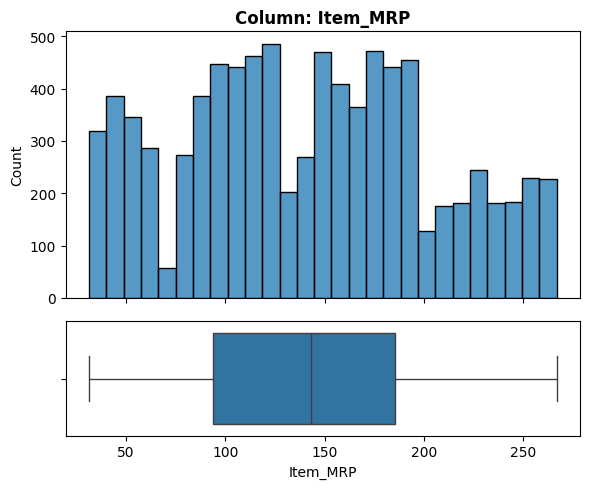

- NaN's Found: 0 (0.0%)
- Unique Values: 5938
- Most common value: '172.0422' occurs 7 times (0.08%)
- Not constant or quasi-constant.


(<Figure size 600x500 with 2 Axes>,
 array([<Axes: title={'center': 'Column: Item_MRP'}, xlabel='Item_MRP', ylabel='Count'>,
        <Axes: xlabel='Item_MRP'>], dtype=object))

In [265]:
explore_numeric(df_sales, x='Item_MRP' )

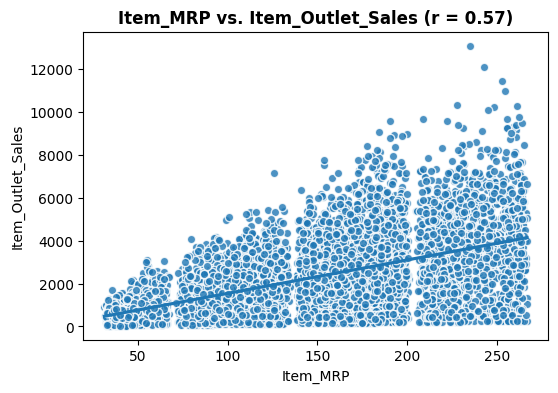

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Item_MRP vs. Item_Outlet_Sales (r = 0.57)'}, xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>)

In [266]:
plot_numeric_vs_target(df_sales, x= 'Item_MRP', y='Item_Outlet_Sales')

In [267]:
corr = df_sales['Item_MRP'].corr(df_sales['Item_Outlet_Sales'])
print("Correlation:", corr)

Correlation: 0.5675744466569194


`Item_MRP` : seems to have medium correlation with the target column, it can be a good perdictor

In [268]:
df_sales.head(1)

,Item_Id,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Id,Est_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138


`Outlet_Size`: The size of the store in terms of ground area covered
categorical feature

/tmp/ipython-input-809621539.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


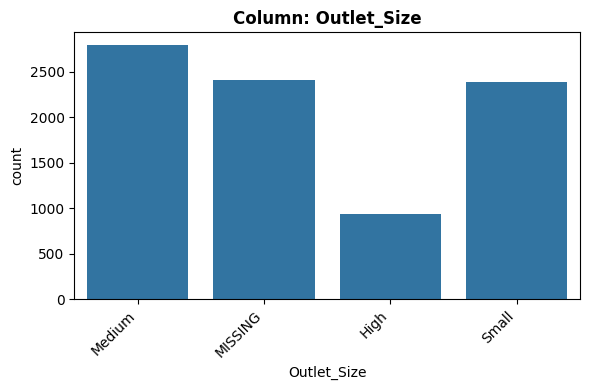

- NaN's Found: 2410 (28.28%)
- Unique Values: 4
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Outlet_Size'}, xlabel='Outlet_Size', ylabel='count'>)

In [269]:
explore_categorical(df_sales, x= 'Outlet_Size')

/tmp/ipython-input-1022643315.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Outlet_Size vs. Item_Outlet_Sales'}, xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>)

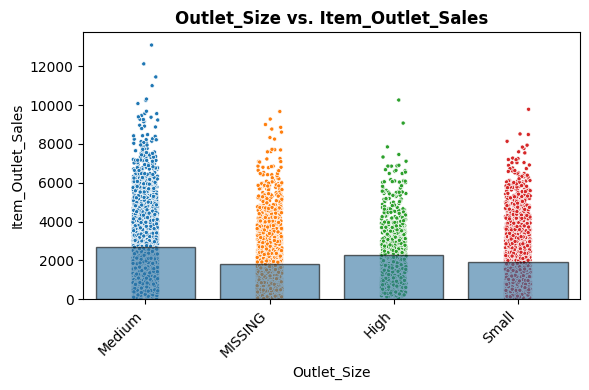

In [270]:
plot_categorical_vs_target(df_sales, x='Outlet_Size',y='Item_Outlet_Sales',fillna=True)

In [271]:
df_sales['Outlet_Size'].isna().sum()

np.int64(2410)

In [272]:
from scipy.stats import f_oneway

categories = df_sales['Outlet_Size'].unique()
groups = [df_sales[df_sales['Outlet_Size'] == cat]['Item_Outlet_Sales'] for cat in categories]
f_stat, p_value = f_oneway(*groups)
print("F-statistic:", f_stat, "p-value:", p_value)

F-statistic: nan p-value: nan


/tmp/ipython-input-2412142027.py:5: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  f_stat, p_value = f_oneway(*groups)


In [273]:
df_sales.head(1)

,Item_Id,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Id,Est_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138


### `Outlet_Location_Type` 	The type of area in which the store is located
categorical column

/tmp/ipython-input-809621539.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


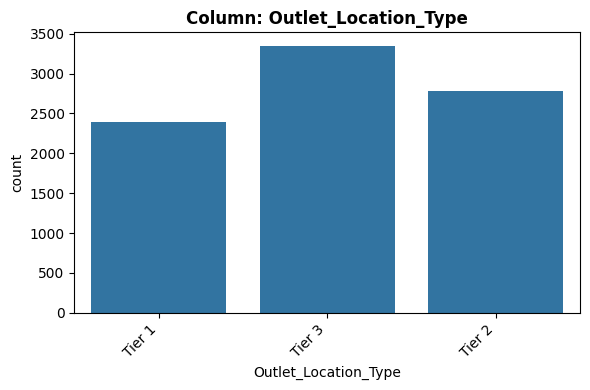

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Tier 3' occurs 3350 times (39.31%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Outlet_Location_Type'}, xlabel='Outlet_Location_Type', ylabel='count'>)

In [274]:
explore_categorical(df_sales,x='Outlet_Location_Type')

there are differences between these 3 unique values, this will lead us to the result that this feature would be a strong predictor for the target feature


/tmp/ipython-input-1022643315.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Outlet_Location_Type vs. Item_Outlet_Sales'}, xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>)

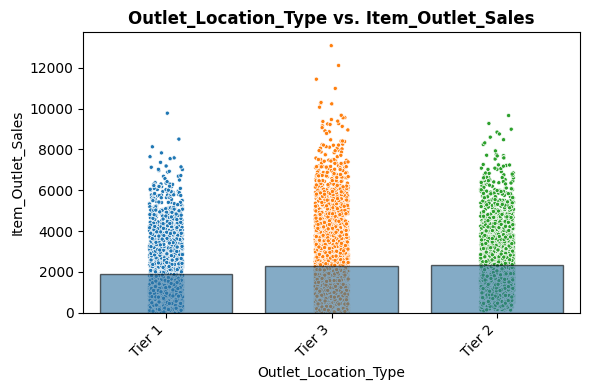

In [275]:
plot_categorical_vs_target(df_sales,x='Outlet_Location_Type', y='Item_Outlet_Sales')

In [276]:
from scipy.stats import f_oneway

categories = df_sales['Outlet_Location_Type'].unique()
groups = [df_sales[df_sales['Outlet_Location_Type'] == cat]['Item_Outlet_Sales'] for cat in categories]
f_stat, p_value = f_oneway(*groups)
print("F-statistic:", f_stat, "p-value:", p_value)

F-statistic: 53.947739874560654 p-value: 5.2228172988842975e-24


Outlet_Location_Type --> from the anova result it seem that there's a strong correlation and it affect target feature,
`Outlet_Location_Type` can be a predictor

### `Outlet_Type`: Whether the outlet is a grocery store or some sort of supermarket


/tmp/ipython-input-809621539.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


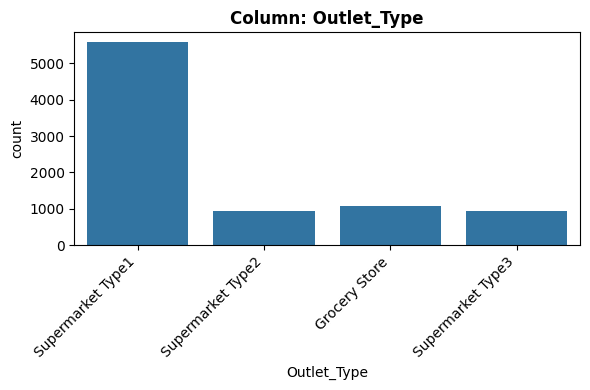

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Outlet_Type'}, xlabel='Outlet_Type', ylabel='count'>)

In [277]:
explore_categorical(df_sales, x= 'Outlet_Type')

/tmp/ipython-input-1022643315.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Outlet_Type vs. Item_Outlet_Sales'}, xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>)

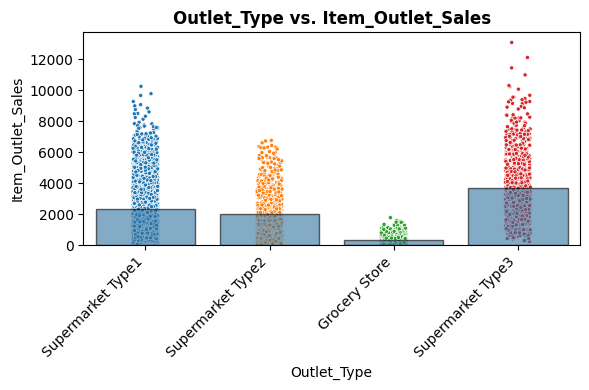

In [278]:
plot_categorical_vs_target(df_sales, x='Outlet_Type',y= 'Item_Outlet_Sales' )

it seems that there are clear differences between the groups, so this would be a good predictor for the target

Average Sales by Outlet Location and Size

In [279]:
#grouping data to calcualte  the average Item_Outlet_Sales for 'Outlet_Location_Type', 'Outlet_Size'
avg_sales_by_location_size = df_sales.groupby(['Outlet_Location_Type', 'Outlet_Size'])['Item_Outlet_Sales'].mean().reset_index()
print(avg_sales_by_location_size)

  Outlet_Location_Type Outlet_Size  Item_Outlet_Sales
0               Tier 1      Medium        2348.354635
1               Tier 1       Small        1576.192909
2               Tier 2       Small        2438.841866
3               Tier 3        High        2298.995256
4               Tier 3      Medium        2847.959679


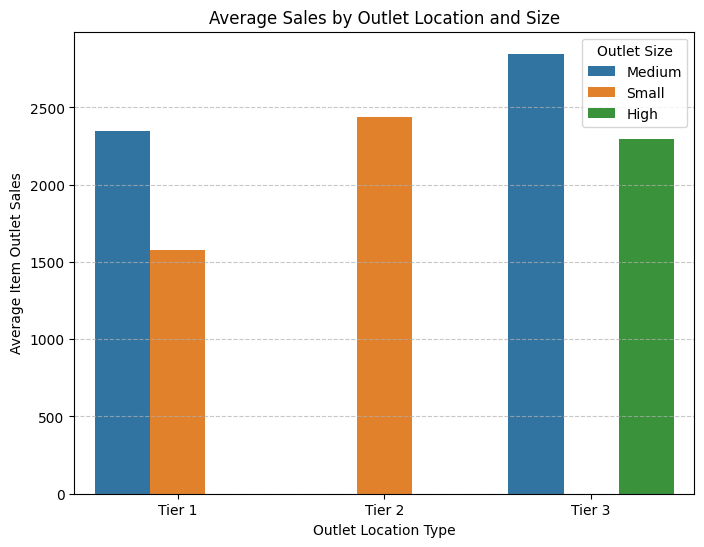

In [280]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', hue='Outlet_Size', data=avg_sales_by_location_size)
plt.title('Average Sales by Outlet Location and Size')
plt.xlabel('Outlet Location Type')
plt.ylabel('Average Item Outlet Sales')
plt.xticks(rotation=0)
plt.legend(title='Outlet Size')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Cumulative Distribution of Item Outlet Sales

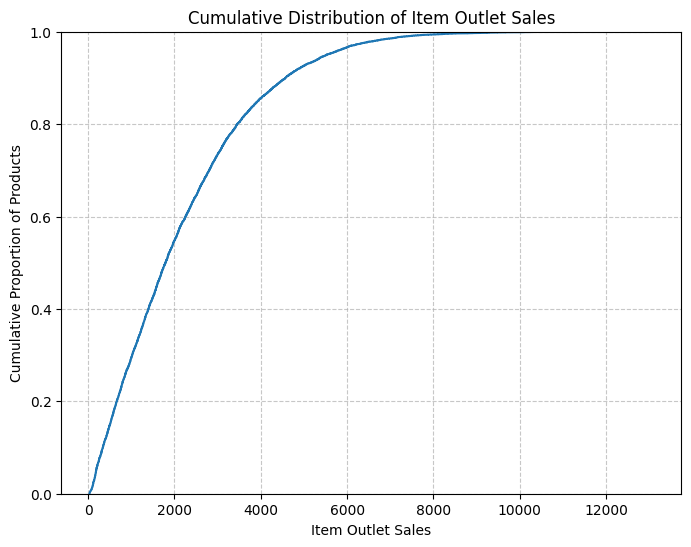

In [281]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# افترض أن لديك DataFrame باسم 'df'
# df = pd.read_csv('your_data.csv')

# Create plot
plt.figure(figsize=(8, 6))
sns.ecdfplot(x='Item_Outlet_Sales', data=df_sales)

# إضافة العنوان وتسمية المحاور
plt.title('Cumulative Distribution of Item Outlet Sales')
plt.xlabel('Item Outlet Sales')
plt.ylabel('Cumulative Proportion of Products')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## prepare data for modeling

### importing libraries

In [282]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Modeling & preprocessing import
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer,make_column_transformer,make_column_selector
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer

In [283]:
df_sales.head()

,Item_Id,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Id,Est_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [284]:
#define target feature
y = df_sales['Item_Outlet_Sales']
X = df_sales.drop(columns=["Item_Outlet_Sales", "Item_Id"])

In [285]:
#split to train and test model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

### making a preprocessing pipe line

#### 1. ordinal data

In [286]:
ord_cols = ["Outlet_Size"]

In [287]:
from sklearn.preprocessing import OrdinalEncoder
impute_ord=SimpleImputer(strategy='most_frequent')
ord_encoder = OrdinalEncoder(categories=[["Small", "Medium", "High"]])
## scaler
scaler = StandardScaler()
ord_pipe=make_pipeline(impute_ord,ord_encoder,scaler)
ord_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('ordinalencoder',
                 OrdinalEncoder(categories=[['Small', 'Medium', 'High']])),
                ('standardscaler', StandardScaler())])

#### Creating a pipline for handling categorical data



In [288]:
cat_cols=num_cols = X_train.select_dtypes("object").drop(columns=ord_cols ).columns
cat_cols


Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Id', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [289]:
# Creating a pipline for handling categorical data

impute_cat = SimpleImputer(strategy='most_frequent')
encoder = OneHotEncoder(handle_unknown='ignore',sparse_output=False)

cat_pipe = make_pipeline(impute_cat,encoder)
cat_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [290]:
cat_pipe.fit_transform(X_train[cat_selector(X_train)])

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
549,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7757,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
764,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6867,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2716,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
5191,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5390,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
860,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


#### numeric pipeline

In [291]:
# save a list of numeric cols
num_cols=X_train.select_dtypes("number").columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Est_Year'], dtype='object')

In [292]:
num_imputer=SimpleImputer(strategy='mean')
scaler = StandardScaler()
num_pipe=make_pipeline(num_imputer,scaler)
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [293]:
from sklearn.compose import make_column_transformer

preprocessor = make_column_transformer(
    (num_pipe, num_cols),
    (cat_pipe, cat_cols),
    (ord_pipe, ord_cols)
)

preprocessor

preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Est_Year'], dtype='object')),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Id', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')),
                                ('pipeline-3',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Small',
                                                                              'Medium',
                                                                              'High']])),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Outlet_Size'])])

In [294]:
preprocessor.fit_transform(X_train)

,pipeline-1__Item_Weight,pipeline-1__Item_Visibility,pipeline-1__Item_MRP,pipeline-1__Est_Year,pipeline-2__Item_Fat_Content_Low Fat,pipeline-2__Item_Fat_Content_Regular,pipeline-2__Item_Type_Baking Goods,pipeline-2__Item_Type_Breads,pipeline-2__Item_Type_Breakfast,pipeline-2__Item_Type_Canned,...,pipeline-2__Outlet_Id_OUT046,pipeline-2__Outlet_Id_OUT049,pipeline-2__Outlet_Location_Type_Tier 1,pipeline-2__Outlet_Location_Type_Tier 2,pipeline-2__Outlet_Location_Type_Tier 3,pipeline-2__Outlet_Type_Grocery Store,pipeline-2__Outlet_Type_Supermarket Type1,pipeline-2__Outlet_Type_Supermarket Type2,pipeline-2__Outlet_Type_Supermarket Type3,pipeline-3__Outlet_Size
549,-0.801383,-0.600703,0.470709,0.136169,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.284198
7757,1.210152,-0.362159,0.457877,0.493521,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.284198
764,1.115491,0.194933,-0.482625,-0.102066,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.383325
6867,-1.079448,-0.704944,-1.603553,0.493521,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.284198
2716,-0.008602,1.383177,0.218375,-0.102066,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.383325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,-0.826231,4.282848,-0.043511,0.017052,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.284198
5191,0.642189,1.001006,-1.059078,1.089109,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.284198
5390,1.115491,-0.916931,1.526207,0.493521,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.284198
860,1.766282,-0.228187,-0.383072,1.089109,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.284198
